# Temperature Forecast Project using ML


Project Description:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:

For more information, read [Cho et al, 2020].

1. station - used weather station number: 1 to 25

2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

19. lat - Latitude (Â°): 37.456 to 37.645

20. lon - Longitude (Â°): 126.826 to 127.135

21. DEM - Elevation (m): 12.4 to 212.3

22. Slope - Slope (Â°): 0.1 to 5.2

23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

Dataset Link-

•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Temperature%20Forecast/temperature.csv


Statement Problem:

To predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset*.

In [1]:
### importing libraries to use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
!pip install scipy
from sklearn.preprocessing import OrdinalEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.svm import  SVR

import warnings
warnings.filterwarnings ("ignore")

In [2]:
# Load the dataset
dataset_url = 'https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/Temperature%20Forecast/temperature.csv'
df_temp = pd.read_csv(dataset_url)



In [3]:
# Display the first few rows of the dataset
df_temp

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [4]:
#Columns present in the dataset 
df_temp.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [5]:
#shape of the Data
df_temp.shape

(7752, 25)

Observation:

This dataset contain the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. The datas are numerical and continous datas. There are 7752 samples in the dataset with 25 columns of which 2 of them are to be considered as the target variables ('Next_Tmax and Next_Tmin').

Data Preprocessing

In [6]:
# Checking the column information
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [7]:
# Check for missing values
print(df_temp.isnull().sum())

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64


In [8]:
total = df_temp.isnull().sum().sort_values(ascending=False)
percent_1 = df_temp.isnull().sum()/df_temp.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
LDAPS_CC3,75,1.0
LDAPS_PPT4,75,1.0
LDAPS_PPT2,75,1.0
LDAPS_PPT1,75,1.0
LDAPS_CC4,75,1.0
LDAPS_CC2,75,1.0
LDAPS_CC1,75,1.0
LDAPS_LH,75,1.0
LDAPS_WS,75,1.0
LDAPS_Tmin_lapse,75,1.0


Observation:

The columns have 2 different data types made up of 1 object dtypes and 24 floats Dtypes.

Most of the columns have missing information. We will be filling the columns with missing information and drop the columns that are not relevant for prediction

In [9]:
# Drop columns that are not relevant for prediction (e.g., 'Date' and 'station' for this example)
df_temp.drop(columns=['Date', 'station'], inplace=True)

In [10]:
# Fill missing values
df_temp['LDAPS_CC3'].fillna(df_temp['LDAPS_CC3'].mean(), inplace=True)
df_temp['LDAPS_PPT4'].fillna(df_temp['LDAPS_PPT4'].mean(), inplace=True)
df_temp['LDAPS_PPT2'].fillna(df_temp['LDAPS_PPT2'].mean(), inplace=True)
df_temp['LDAPS_PPT1'].fillna(df_temp['LDAPS_PPT1'].mean(), inplace=True)
df_temp['LDAPS_CC4'].fillna(df_temp['LDAPS_CC4'].mean(), inplace=True)
df_temp['LDAPS_CC2'].fillna(df_temp['LDAPS_CC2'].mean(), inplace=True)
df_temp['LDAPS_CC1'].fillna(df_temp['LDAPS_CC1'].mean(), inplace=True)
df_temp['LDAPS_LH'].fillna(df_temp['LDAPS_LH'].mean(), inplace=True)
df_temp['LDAPS_WS'].fillna(df_temp['LDAPS_WS'].mean(), inplace=True)
df_temp['LDAPS_Tmin_lapse'].fillna(df_temp['LDAPS_Tmin_lapse'].mean(), inplace=True)
df_temp['LDAPS_Tmax_lapse'].fillna(df_temp['LDAPS_Tmax_lapse'].mean(), inplace=True)
df_temp['LDAPS_RHmax'].fillna(df_temp['LDAPS_RHmax'].mean(), inplace=True)
df_temp['LDAPS_RHmin'].fillna(df_temp['LDAPS_RHmin'].mean(), inplace=True)
df_temp['LDAPS_PPT3'].fillna(df_temp['LDAPS_PPT3'].mean(), inplace=True)
df_temp['Present_Tmin'].fillna(df_temp['Present_Tmin'].mean(), inplace=True)
df_temp['Present_Tmax'].fillna(df_temp['Present_Tmax'].mean(), inplace=True)
df_temp['Next_Tmax'].fillna(df_temp['Next_Tmax'].mean(), inplace=True)
df_temp['Next_Tmin'].fillna(df_temp['Next_Tmin'].mean(), inplace=True)


In [11]:
# Check for missing values
print(df_temp.isnull().sum())

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64


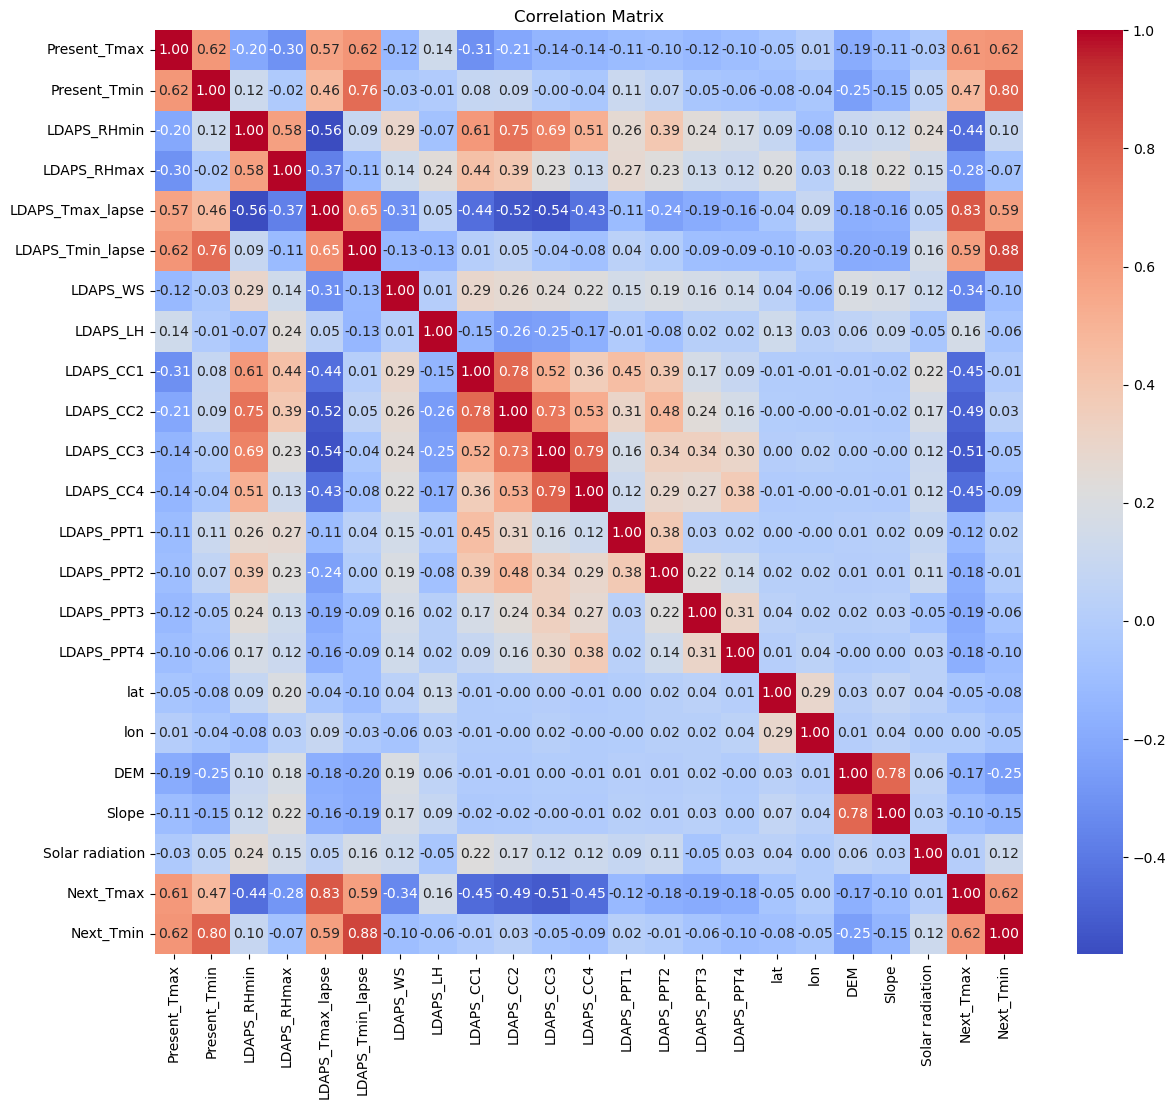

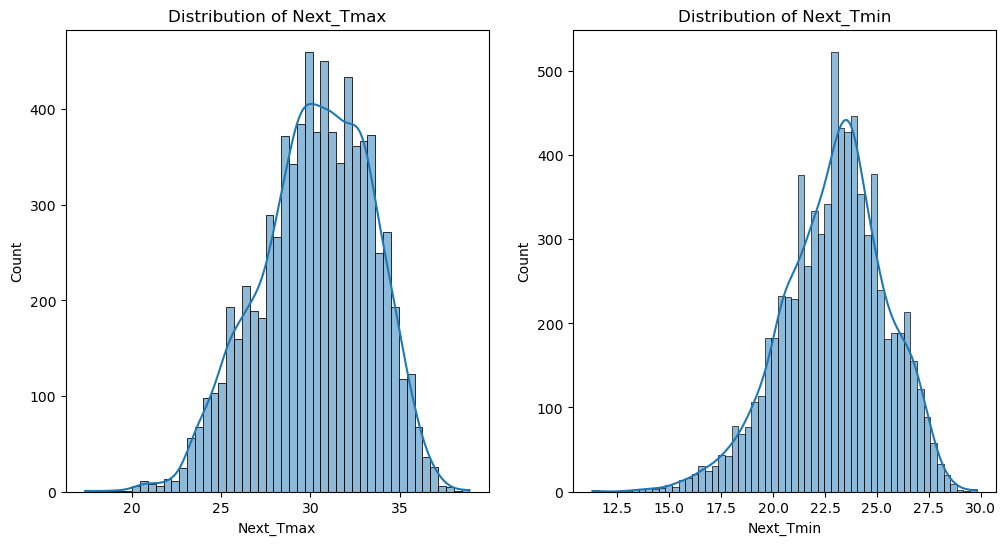

In [12]:
# Plot correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(df_temp.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Histograms of the target variables
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_temp['Next_Tmax'], kde=True)
plt.title('Distribution of Next_Tmax')

plt.subplot(1, 2, 2)
sns.histplot(df_temp['Next_Tmin'], kde=True)
plt.title('Distribution of Next_Tmin')

plt.show()

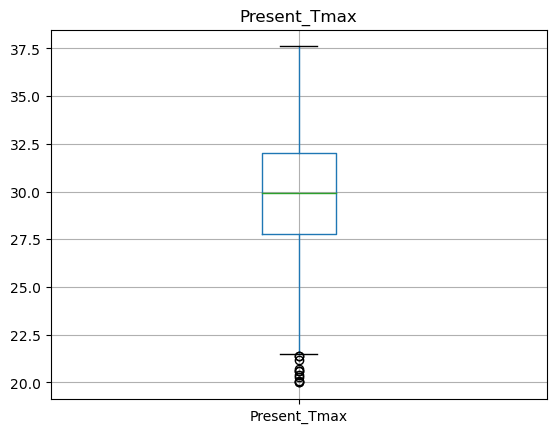

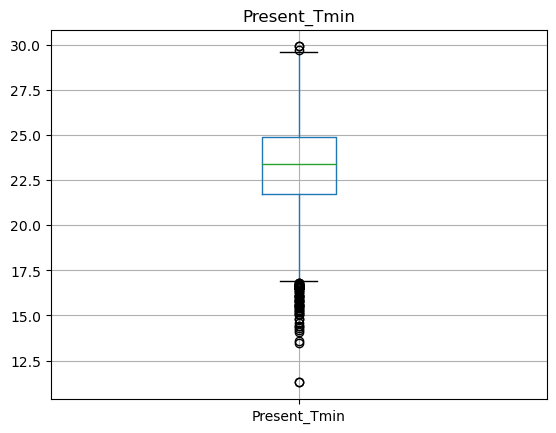

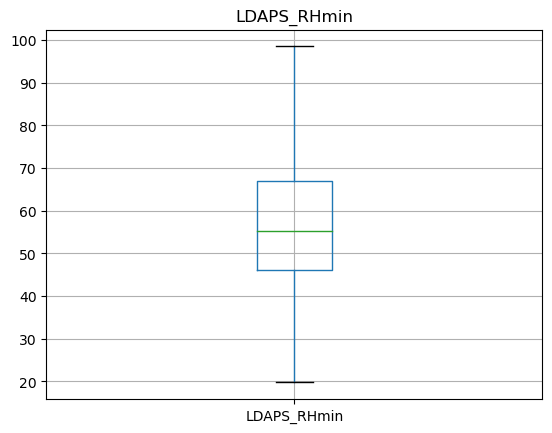

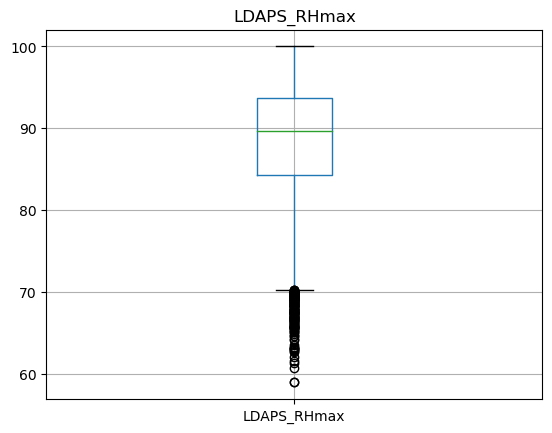

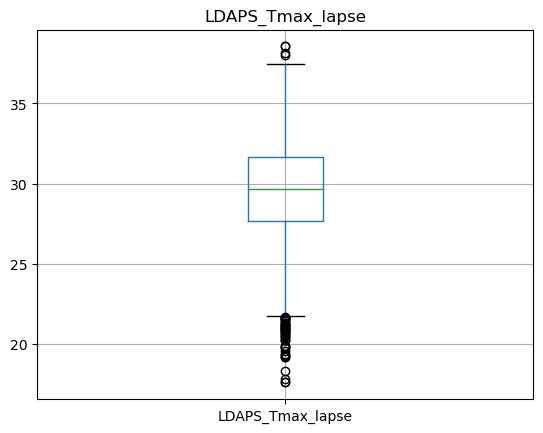

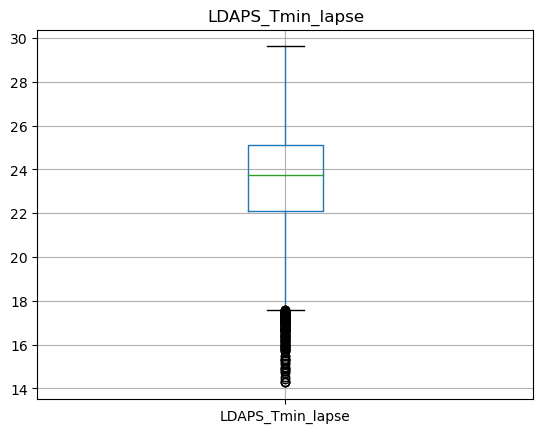

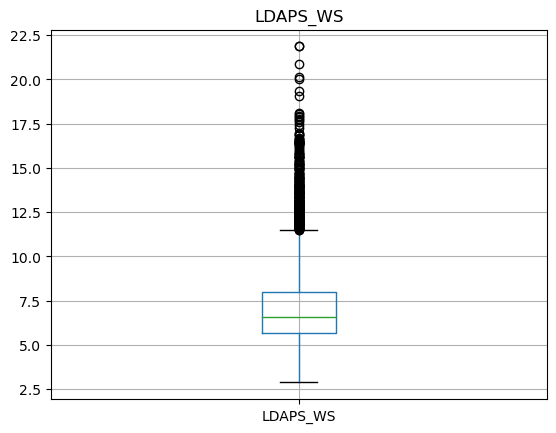

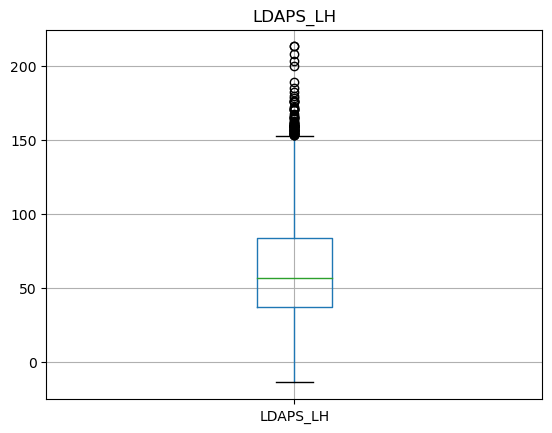

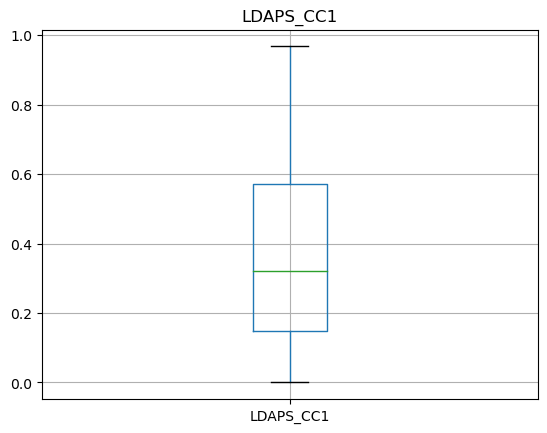

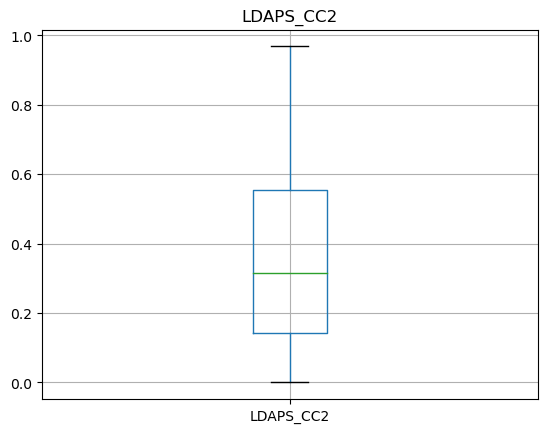

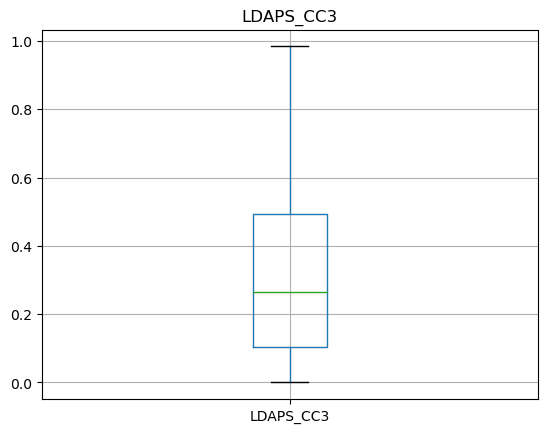

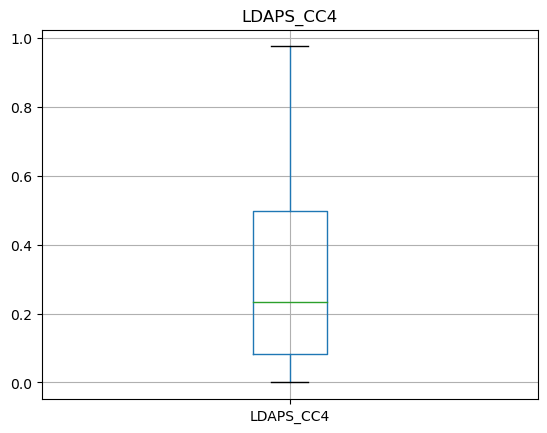

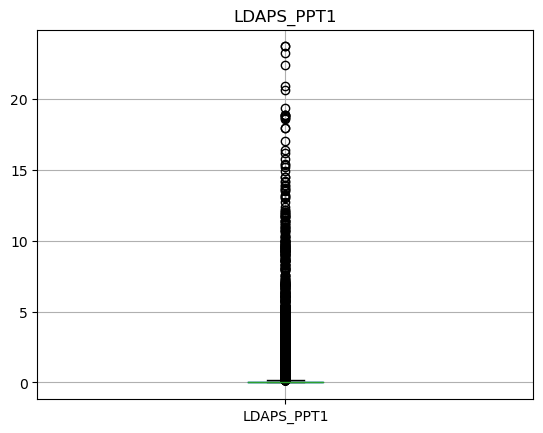

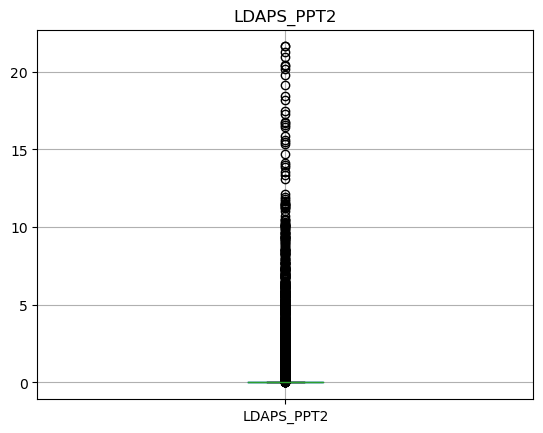

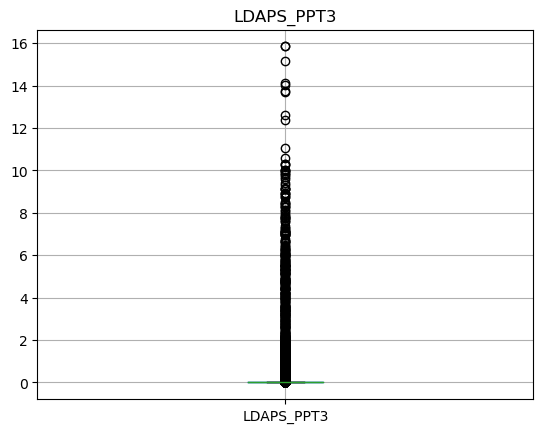

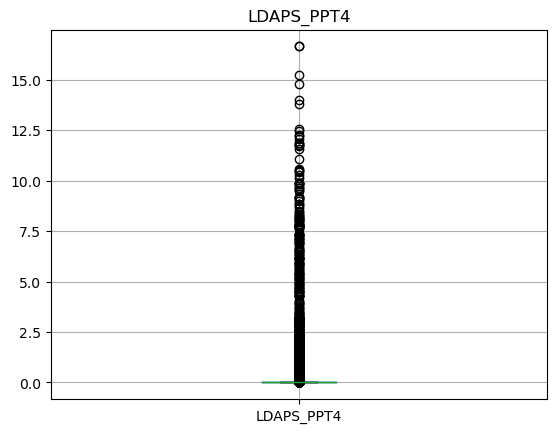

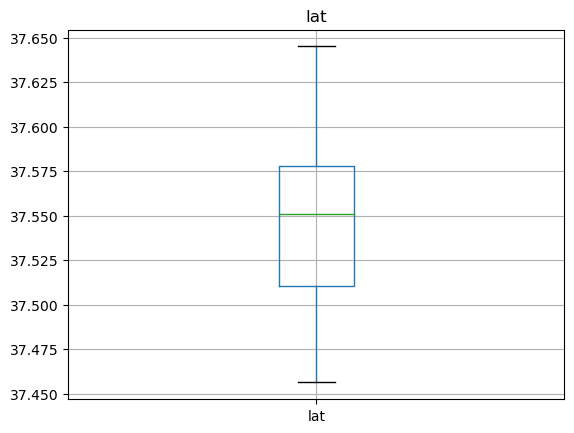

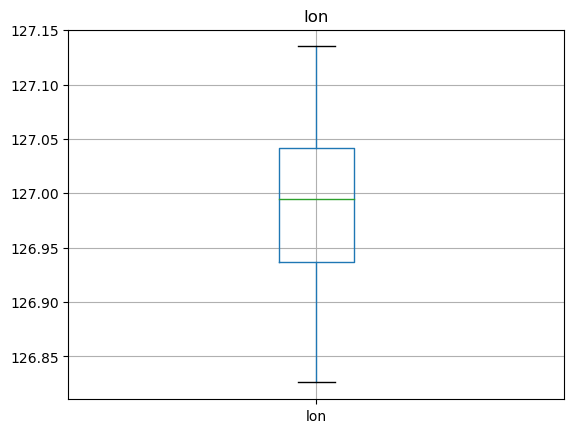

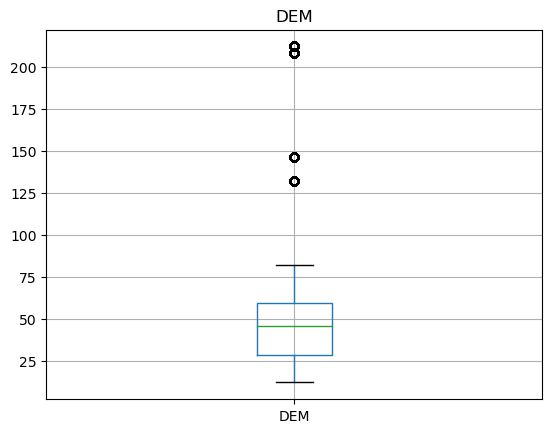

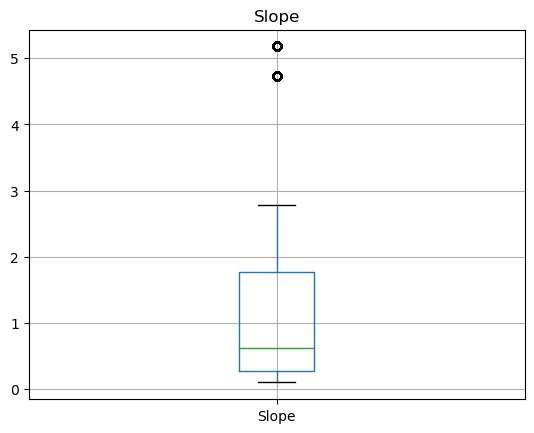

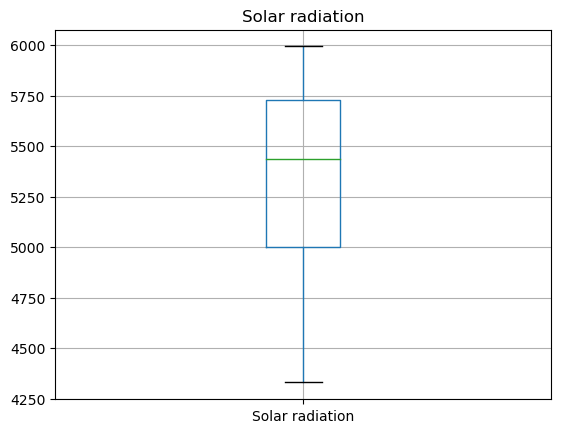

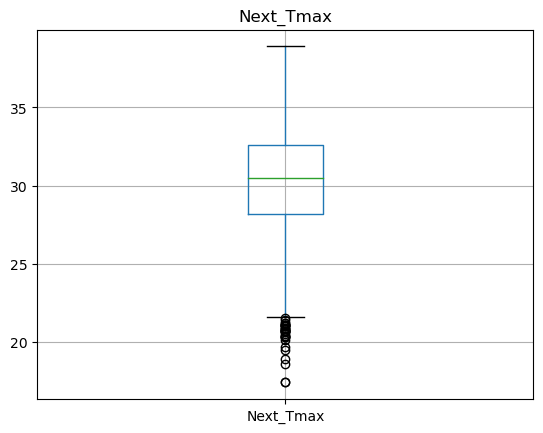

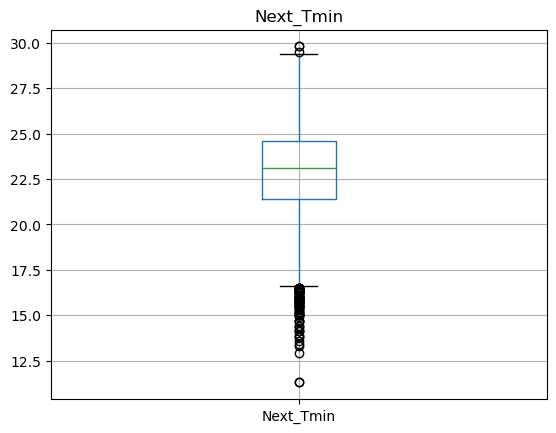

In [13]:
# Draw boxplot for each column to check Outliers
for column in df_temp:
    if column in df_temp:
        plt.figure()
        plt.gca().set_title(column)
        df_temp.boxplot([column])

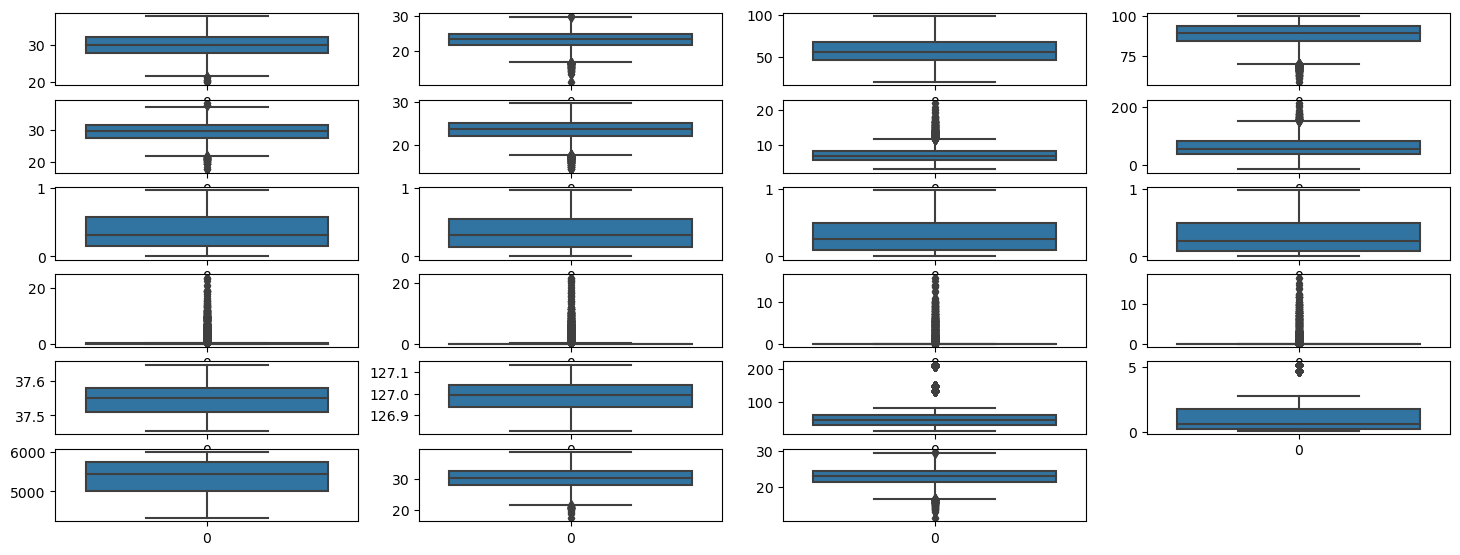

In [14]:
plt.figure(figsize=(18,10))
for o in enumerate(df_temp):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df_temp[o[1]])

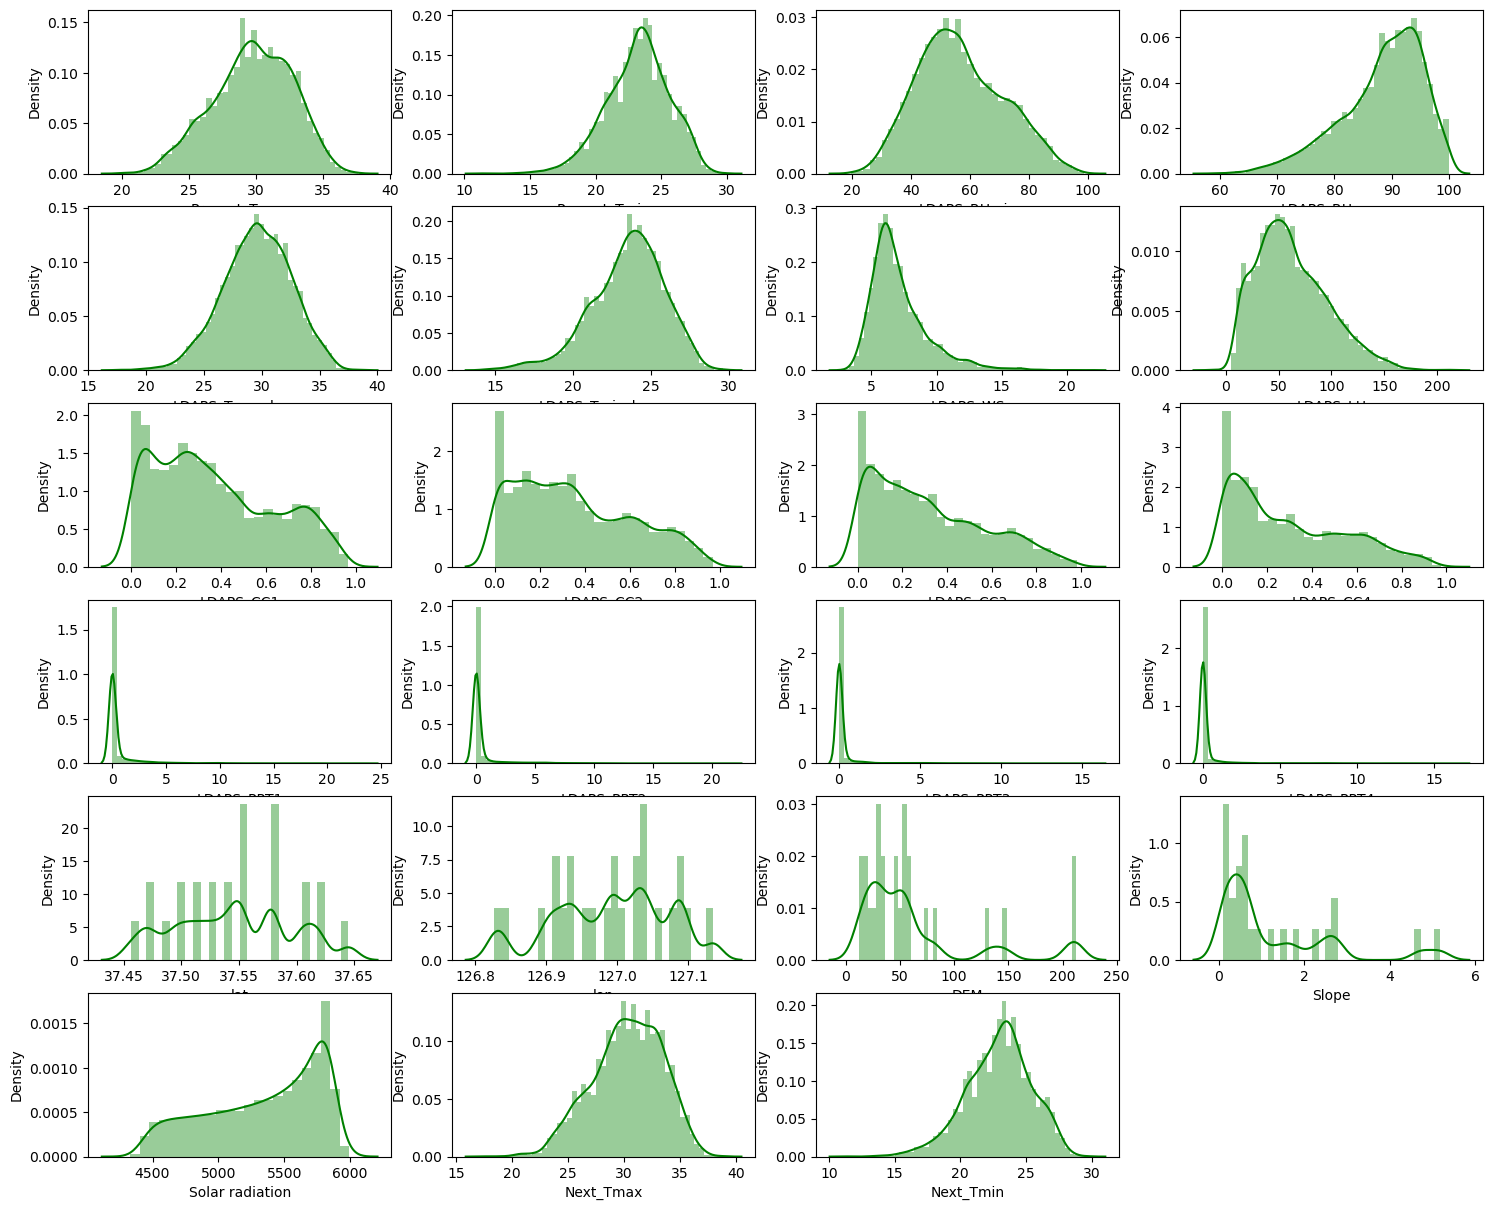

In [15]:
#checking skewing of the dataset distribution 
plt.figure(figsize=(18,20))
for i in enumerate(df_temp):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df_temp[i[1]],color='g')

In [16]:
#Removing Outlier

from scipy.stats import zscore

z=np.abs(zscore(df_temp[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin','LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS','LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon','DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']]))
print(np.where(z>3))

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64), array([ 6, 13, 13, ..., 13, 14, 15], dtype=int64))


In [17]:
# Checking the shape of the dataset after outliers have been remove and reassigning the changed dataframe name to our original dataframe name
z = np.abs(zscore(df_temp[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin','LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS','LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon','DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']]))
threshold = 3
df1 = df_temp[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df_temp.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df_temp.shape[0]-df1.shape[0])/df_temp.shape[0]*100)

df_temp=df1.copy() 

Shape of the dataframe before removing outliers:  (7752, 23)
Shape of the dataframe after removing outliers:  (6894, 23)
Percentage of data loss post outlier removal:  11.06811145510836


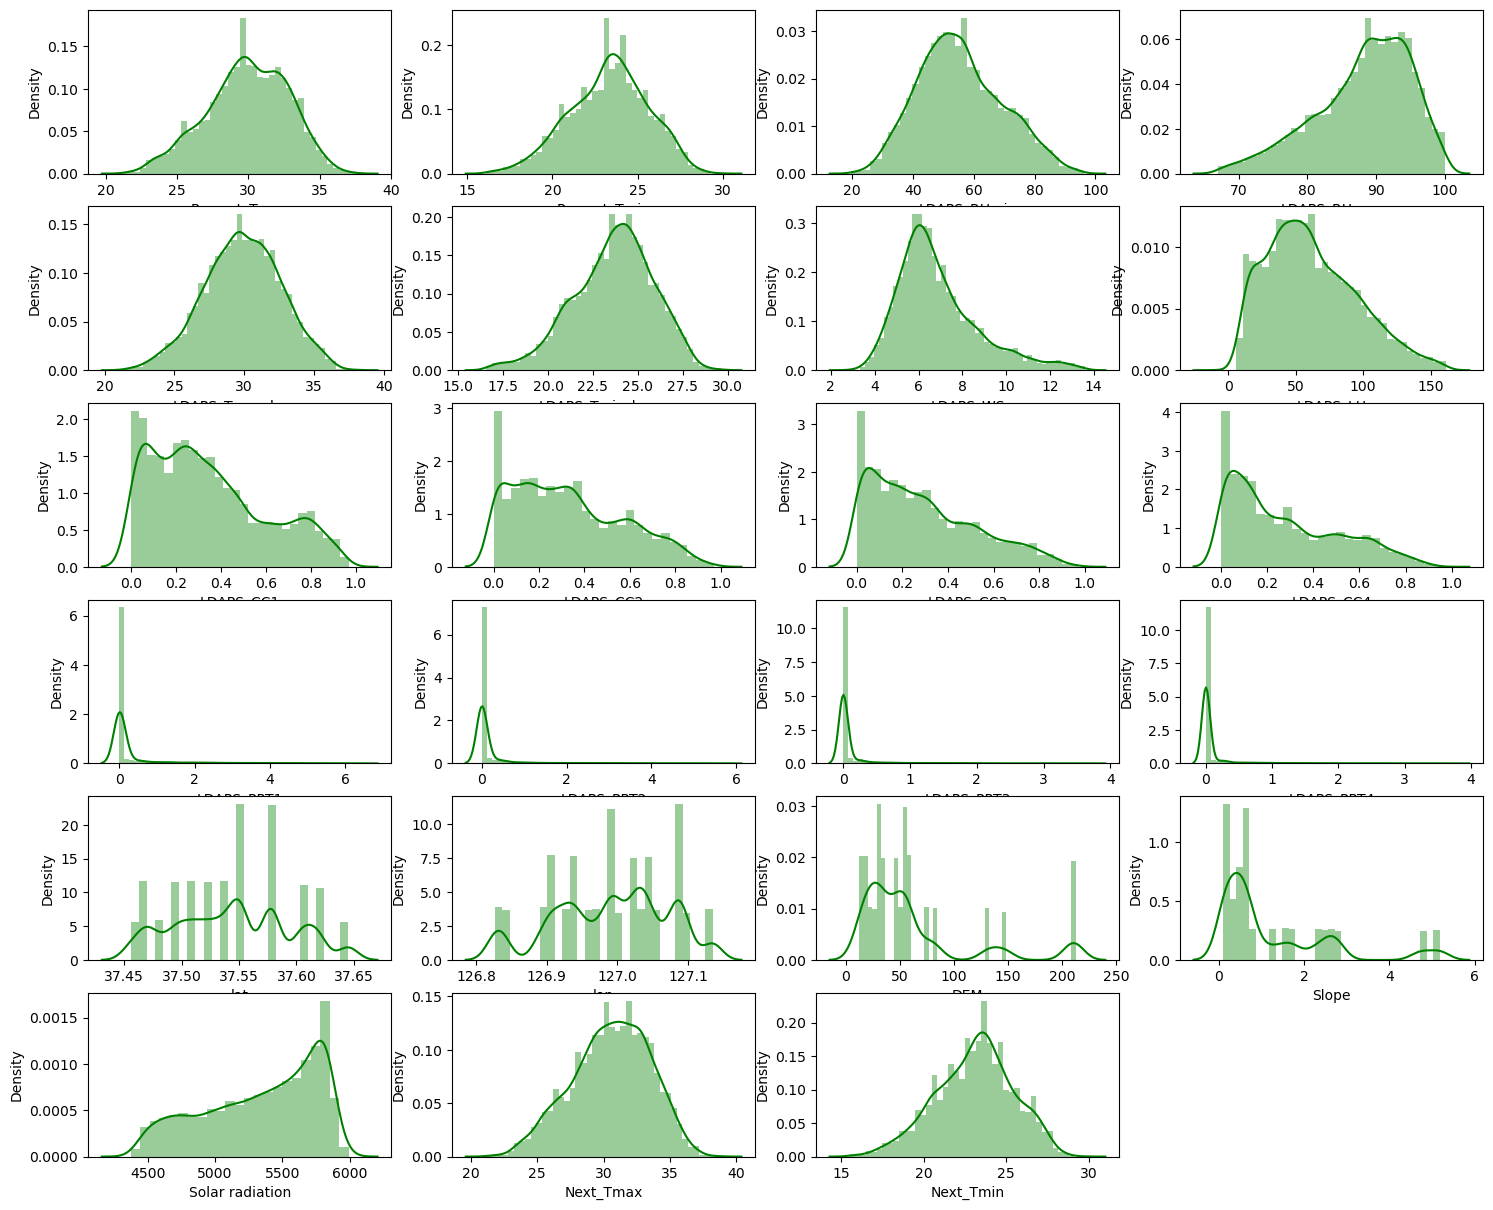

In [18]:
#checking skewing of the dataset distribution 
plt.figure(figsize=(18,20))
for i in enumerate(df_temp):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df_temp[i[1]],color='g')

In [19]:
df_temp.skew()

Present_Tmax       -0.272653
Present_Tmin       -0.225479
LDAPS_RHmin         0.305740
LDAPS_RHmax        -0.688257
LDAPS_Tmax_lapse   -0.109372
LDAPS_Tmin_lapse   -0.382667
LDAPS_WS            1.087781
LDAPS_LH            0.568781
LDAPS_CC1           0.593990
LDAPS_CC2           0.500911
LDAPS_CC3           0.700217
LDAPS_CC4           0.710930
LDAPS_PPT1          3.731226
LDAPS_PPT2          4.843672
LDAPS_PPT3          5.482625
LDAPS_PPT4          5.927822
lat                 0.108251
lon                -0.275508
DEM                 1.764031
Slope               1.593600
Solar radiation    -0.505353
Next_Tmax          -0.270084
Next_Tmin          -0.237767
dtype: float64

In [20]:
cor_temp =df_temp.corr()
cor_temp

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Present_Tmax,1.000000,0.612869,-0.151799,-0.295184,0.534696,0.609642,-0.104222,0.129469,-0.286673,-0.155984,...,-0.037113,-0.012032,-0.038329,-0.050398,0.011214,-0.168532,-0.091561,-0.064734,0.586403,0.616843
Present_Tmin,0.612869,1.000000,0.150633,-0.038516,0.434144,0.752887,0.019815,-0.003840,0.090553,0.117494,...,0.087087,0.041499,-0.047673,-0.071014,-0.043494,-0.239765,-0.137911,0.011582,0.446660,0.785261
LDAPS_RHmin,-0.151799,0.150633,1.000000,0.552690,-0.555284,0.131633,0.240804,-0.037860,0.575977,0.714711,...,0.378324,0.261354,0.185773,0.088642,-0.094266,0.095774,0.119976,0.251406,-0.428028,0.133571
LDAPS_RHmax,-0.295184,-0.038516,0.552690,1.000000,-0.386650,-0.140126,0.097805,0.271313,0.411650,0.362241,...,0.227141,0.120047,0.105881,0.198806,0.016957,0.172592,0.218423,0.154352,-0.300434,-0.096533
LDAPS_Tmax_lapse,0.534696,0.434144,-0.555284,-0.386650,1.000000,0.620262,-0.232181,0.037524,-0.417050,-0.494336,...,-0.242213,-0.143261,-0.160780,-0.036545,0.103314,-0.163030,-0.149906,0.012626,0.805676,0.547000
LDAPS_Tmin_lapse,0.609642,0.752887,0.131633,-0.140126,0.620262,1.000000,-0.052768,-0.134505,0.038241,0.101757,...,0.008682,0.011985,-0.080987,-0.088591,-0.028678,-0.177581,-0.173000,0.107649,0.538722,0.867095
LDAPS_WS,-0.104222,0.019815,0.240804,0.097805,-0.232181,-0.052768,1.000000,-0.046063,0.262525,0.224522,...,0.118174,0.128641,0.197393,-0.014222,-0.075586,0.153256,0.120189,0.134556,-0.275316,-0.012735
LDAPS_LH,0.129469,-0.003840,-0.037860,0.271313,0.037524,-0.134505,-0.046063,1.000000,-0.144830,-0.258271,...,-0.068520,0.010293,0.038315,0.122850,0.021891,0.064055,0.097418,-0.036532,0.172888,-0.045762
LDAPS_CC1,-0.286673,0.090553,0.575977,0.411650,-0.417050,0.038241,0.262525,-0.144830,1.000000,0.759678,...,0.394688,0.194218,0.196659,-0.006864,-0.013743,-0.026628,-0.033004,0.242596,-0.447965,0.009312
LDAPS_CC2,-0.155984,0.117494,0.714711,0.362241,-0.494336,0.101757,0.224522,-0.258271,0.759678,1.000000,...,0.480103,0.250074,0.188960,-0.003749,-0.013838,-0.024019,-0.029514,0.186684,-0.478533,0.078341


In [21]:
df_temp.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,...,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000
mean,29.937593,23.310952,55.611584,88.101025,29.883791,23.651018,6.864507,61.968514,0.345529,0.331675,...,0.210588,0.105183,0.088069,37.543921,126.990820,61.054583,1.237473,5340.908071,30.563660,23.084466
std,2.854338,2.306769,13.824432,6.910302,2.735174,2.215289,1.838526,33.238068,0.250532,0.239644,...,0.741144,0.396077,0.361534,0.049965,0.079677,53.495688,1.350592,420.107515,2.932898,2.353359
min,21.200000,16.100000,19.794666,66.989464,21.195428,16.558304,2.882580,-8.569043,0.000000,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4371.684570,21.100000,15.500000
25%,28.100000,21.700000,45.720074,83.955292,28.026182,22.225706,5.626578,36.711938,0.138482,0.134639,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,5017.061523,28.600000,21.500000
50%,30.000000,23.400000,54.344843,89.190006,29.900551,23.837372,6.459551,57.166298,0.297998,0.298513,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5428.761230,30.700000,23.200000
75%,32.100000,24.900000,65.037983,93.409286,31.805765,25.194450,7.729514,84.150760,0.500953,0.511601,...,0.006291,0.002308,0.000000,37.577600,127.042000,59.832400,1.767800,5716.302246,32.700000,24.700000
max,37.600000,29.900000,96.169815,99.999008,38.140534,29.619342,13.589191,161.661149,0.967277,0.968353,...,5.743190,3.720154,3.789353,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000


# Model Training and Evaluation:

Model Building for Next_Tmax

In [22]:
# Define the feature set and target variable for Next_Tmax prediction
x= df_temp.drop(columns=['Next_Tmax', 'Next_Tmin'])
y= df_temp['Next_Tmax']

In [23]:
# Feature scaling using standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,-0.433615,-0.828471,0.191277,0.436386,-0.661684,-0.290765,-0.024815,0.225159,-0.445412,-0.533242,...,-0.620382,-0.346539,-0.28416,-0.265581,-0.243617,1.214518,0.002256,2.828104,1.145897,1.552067
1,0.687567,-0.741763,-0.242211,0.362340,-0.012103,0.173349,-0.637849,-0.301816,-0.479100,-0.333449,...,-0.634027,-0.346539,-0.28416,-0.265581,-0.243617,1.214518,0.516874,-0.304573,-0.535636,1.257875
2,0.582457,-0.004748,-0.500679,-0.597331,0.075869,0.412895,-0.395064,-1.245514,-0.543626,-0.309670,...,-0.572652,-0.346539,-0.28416,-0.265581,-0.243617,0.674104,0.843217,-0.518730,-0.719273,1.244171
3,0.722604,0.038606,0.190127,1.213156,-0.065508,-0.146647,-0.660608,0.113090,-0.515570,-0.440987,...,-0.606228,-0.346539,-0.28416,-0.265581,-0.243617,2.023139,0.391357,-0.286746,0.960631,1.228481
4,0.512383,-0.611702,0.040693,0.297274,-0.281486,-0.074279,-0.614397,1.383966,-0.774897,-0.340861,...,-0.453742,-0.346539,-0.28416,-0.265581,-0.243617,0.135691,1.809694,-0.486366,-0.542004,1.234641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,-2.395683,-2.389208,-2.236969,-1.424012,-0.757262,-2.414309,-0.142110,-1.575249,-1.168108,-1.258230,...,-1.159817,-0.346539,-0.28416,-0.265581,-0.243617,0.135691,0.617287,-0.649755,-0.492689,-2.106479
6890,-2.605905,-2.562623,-1.845904,-0.638370,-1.162309,-2.635053,-0.596404,0.607125,-1.113984,-1.281810,...,-1.103133,-0.346539,-0.28416,-0.265581,-0.243617,-0.674931,1.194663,-0.730725,-0.817681,-2.140332
6891,-2.325609,-2.692685,-2.088503,-1.335953,-1.291313,-2.200929,-0.389247,0.303583,-1.259392,-1.045958,...,-1.178487,-0.346539,-0.28416,-0.265581,-0.243617,-0.134517,-1.252910,-0.849980,-0.801243,-2.136737
6892,-2.325609,-2.432562,-2.283872,-1.563873,-1.050685,-2.219962,-0.174983,-0.443110,-1.236082,-1.071300,...,-1.178487,-0.346539,-0.28416,-0.265581,-0.243617,-0.404724,-1.026980,-0.818050,-0.751705,-2.148498


In [24]:
# Spliting the data into Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Model Training and Evaluation:

In [25]:
#Model Training
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)
pred_random_forest = random_forest.predict(x_test)
pred_train = random_forest.predict(x_train)


R2_Score_rf = r2_score(y_test, pred_random_forest)*100
R2_Score_training_rf = r2_score(y_train, pred_train)*100
Mean_Absolute_error_rf = mean_absolute_error(y_test, pred_random_forest)
Mean_Squared_error_rf = mean_squared_error(y_test, pred_random_forest)
Root_Mean_Squared_error_rf= np.sqrt(mean_squared_error(y_test, pred_random_forest))

print(random_forest)
print("R2_Score_rf: ", R2_Score_rf)
print("R2_Score on training Data: ", R2_Score_training_rf)
print("Mean Absolute error: ", Mean_Absolute_error_rf)
print("Mean Squared error: ", Mean_Squared_error_rf)
print("Root Mean Squared error: ", Root_Mean_Squared_error_rf)

RandomForestRegressor()
R2_Score_rf:  87.19059153832038
R2_Score on training Data:  98.25283438498606
Mean Absolute error:  0.7808952889080761
Mean Squared error:  1.1019648511114137
Root Mean Squared error:  1.0497451362647097


2. K Nearest Neighbor:

In [26]:
knn =KNeighborsRegressor(n_neighbors = 3)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)


R2_Score_kn = r2_score(y_test, pred_knn)*100
R2_Score_training_kn = r2_score(y_train, pred_train)*100
Mean_Absolute_error_kn = mean_absolute_error(y_test, pred_knn)
Mean_Squared_error_kn = mean_squared_error(y_test, pred_knn)
Root_Mean_Squared_error_kn= np.sqrt(mean_squared_error(y_test, pred_knn))

print(knn)
print("R2_Score_kn: ", R2_Score_kn)
print("R2_Score on training Data: ", R2_Score_training_kn)
print("Mean Absolute error: ", Mean_Absolute_error_kn)
print("Mean Squared error: ", Mean_Squared_error_kn)
print("Root Mean Squared error: ", Root_Mean_Squared_error_kn)

KNeighborsRegressor(n_neighbors=3)
R2_Score_kn:  83.26760952731308
R2_Score on training Data:  92.24493383009438
Mean Absolute error:  0.8805219913001449
Mean Squared error:  1.439450247147068
Root Mean Squared error:  1.1997709144445319


3. Decision Tree:

In [27]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)
pred_decision_tree = decision_tree.predict(x_test)
pred_train = decision_tree.predict(x_train)

R2_Score_dt = r2_score(y_test, pred_decision_tree)*100
R2_Score_training_dt = r2_score(y_train, pred_train)*100
Mean_Absolute_error_dt = mean_absolute_error(y_test, pred_decision_tree)
Mean_Squared_error_dt = mean_squared_error(y_test, pred_decision_tree)
Root_Mean_Squared_error_dt =  np.sqrt(mean_squared_error(y_test, pred_decision_tree))

print(decision_tree)
print("R2_Score_dt: ", R2_Score_dt)
print("R2_Score on training Data: ", R2_Score_training_dt)
print("Mean Absolute error: ", Mean_Absolute_error_dt)
print("Mean Squared error: ", Mean_Squared_error_dt)
print("Root Mean Squared error: ", Root_Mean_Squared_error_dt)

DecisionTreeRegressor()
R2_Score_dt:  71.19008107349444
R2_Score on training Data:  100.0
Mean Absolute error:  1.1250119736407846
Mean Squared error:  2.478453092924148
Root Mean Squared error:  1.5743103547027022


4. Logistic Regression:

In [28]:
logreg = LinearRegression()
logreg.fit(x_train, y_train)
pred_logreg = logreg.predict(x_test)
pred_train = logreg.predict(x_train)

R2_Score_lo = r2_score(y_test, pred_logreg)*100
R2_Score_training_lo = r2_score(y_train, pred_train)*100
Mean_Absolute_error_lo = mean_absolute_error(y_test, pred_logreg)
Mean_Squared_error_lo = mean_squared_error(y_test, pred_logreg)
Root_Mean_Squared_error_lo =  np.sqrt(mean_squared_error(y_test, pred_logreg))

print(logreg)
print("R2_Score_lo: ", R2_Score_lo)
print("R2_Score on training Data: ",R2_Score_training_lo)
print("Mean Absolute error: ", Mean_Absolute_error_lo)
print("Mean Squared error: ", Mean_Squared_error_lo)
print("Root Mean Squared error: ", Root_Mean_Squared_error_lo)

LinearRegression()
R2_Score_lo:  73.9481430180847
R2_Score on training Data:  74.60305077046388
Mean Absolute error:  1.1261762197638578
Mean Squared error:  2.2411831729884417
Root Mean Squared error:  1.497058172880547


5. Gradient Boosting: 

In [29]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train, y_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)

R2_Score_gbr = r2_score(y_test, pred_GBR)*100
R2_Score_training_gbr = r2_score(y_train, pred_train)*100
Mean_Absolute_error_gbr = mean_absolute_error(y_test, pred_GBR)
Mean_Squared_error_gbr = mean_squared_error(y_test, pred_GBR)
Root_Mean_Squared_error_gbr =  np.sqrt(mean_squared_error(y_test, pred_GBR))

print(GBR)
print("R2_Score_gbr: ", R2_Score_gbr)
print("R2_Score on training Data: ", R2_Score_training_gbr)
print("Mean Absolute error: ", Mean_Absolute_error_gbr)
print("Mean Squared error: ", Mean_Squared_error_gbr)
print("Root Mean Squared error: ", Root_Mean_Squared_error_gbr)

GradientBoostingRegressor()
R2_Score_gbr:  82.23602873641636
R2_Score on training Data:  86.31811398860717
Mean Absolute error:  0.9422407869439452
Mean Squared error:  1.528194842656738
Root Mean Squared error:  1.236201780720582


6. Lasso

In [30]:
lass = Lasso()
lass.fit(x_train, y_train)
pred_lass = lass.predict(x_test)
pred_train = lass.predict(x_train)

R2_Score_las = r2_score(y_test, pred_lass)*100
R2_Score_training_las = r2_score(y_train, pred_train)*100
Mean_Absolute_error_las = mean_absolute_error(y_test, pred_lass)
Mean_Squared_error_las =  mean_squared_error(y_test, pred_lass)
Root_Mean_Squared_error_las = np.sqrt(mean_squared_error(y_test, pred_lass))

print(lass)
print("R2_Score_las: ", R2_Score_las)
print("R2_Score on training Data: ", R2_Score_training_las)
print("Mean Absolute error: ", Mean_Absolute_error_las)
print("Mean Squared error: ", Mean_Squared_error_las)
print("Root Mean Squared error: ", Root_Mean_Squared_error_las)

Lasso()
R2_Score_las:  51.78941999563138
R2_Score on training Data:  54.233843309577146
Mean Absolute error:  1.6158847908815541
Mean Squared error:  4.1474487112688125
Root Mean Squared error:  2.0365285932853516


7. Ridge

In [31]:
rid = Ridge()
rid .fit(x_train, y_train)
pred_rid  = rid .predict(x_test)
pred_train = rid .predict(x_train)

R2_Score_rid = r2_score(y_test, pred_rid)*100
R2_Score_training_rid = r2_score(y_train, pred_train)*100
Mean_Absolute_error_rid = mean_absolute_error(y_test, pred_rid)
Mean_Squared_error_rid =  mean_squared_error(y_test, pred_rid)
Root_Mean_Squared_error_rid = np.sqrt(mean_squared_error(y_test, pred_rid))

print(rid )
print("R2_Score_rid: ", R2_Score_rid)
print("R2_Score on training Data: ", R2_Score_training_rid)
print("Mean Absolute error: ", Mean_Absolute_error_rid)
print("Mean Squared error: ", Mean_Squared_error_rid)
print("Root Mean Squared error: ", Root_Mean_Squared_error_rid)

Ridge()
R2_Score_rid:  73.94687888737816
R2_Score on training Data:  74.60304199931215
Mean Absolute error:  1.126193140849116
Mean Squared error:  2.2412919233347193
Root Mean Squared error:  1.49709449378946


8. SVR

In [32]:
svr = SVR()
svr.fit(x_train, y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)

R2_Score_svr = r2_score(y_test, pred_svr)*100
R2_Score_training_svr = r2_score(y_train, pred_train)*100
Mean_Absolute_error_svr = mean_absolute_error(y_test, pred_svr)
Mean_Squared_error_svr =  mean_squared_error(y_test, pred_svr)
Root_Mean_Squared_error_svr = np.sqrt(mean_squared_error(y_test, pred_svr))

print(svr)
print("R2_Score_svr: ", R2_Score_svr)
print("R2_Score on training Data: ", R2_Score_training_svr)
print("Mean Absolute error: ", Mean_Absolute_error_svr)
print("Mean Squared error: ", Mean_Squared_error_svr)
print("Root Mean Squared error: ", Root_Mean_Squared_error_svr)

SVR()
R2_Score_svr:  82.83596173210472
R2_Score on training Data:  86.91483988217372
Mean Absolute error:  0.8685444281041754
Mean Squared error:  1.4765839446009619
Root Mean Squared error:  1.2151477048494812


In [33]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'KNN', 'Decision Tree', 
              'Linear Regression', 'Gradient Boosting', 'Lasso', 
              'Ridge', 'SVR'],
    'Score': [R2_Score_rf, R2_Score_kn, R2_Score_dt, 
              R2_Score_lo, R2_Score_gbr, R2_Score_las, 
             R2_Score_rid, R2_Score_svr]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
87.190592,Random Forest
83.267610,KNN
82.835962,SVR
82.236029,Gradient Boosting
73.948143,Linear Regression
73.946879,Ridge
71.190081,Decision Tree
51.789420,Lasso


As we can see, Random Forest is ranked the first on the table with the highest R2 Score. Checking how Random Forest performs.

In [34]:
#Saving the best model
import joblib
joblib.dump(random_forest, "Temperature_forecast.pkl")

['Temperature_forecast.pkl']

In [35]:
# PREDICTION OF TEST RESULT
y_pred = random_forest.predict(x_test)
print('Predictions:\n', y_pred)

Predictions:
 [30.051 26.954 32.15  ... 32.47  32.572 27.673]


In [36]:
# COMPARING TEST DATA AND PREDICTED DATA
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
print('Actual test data vs predicted: \n', comparison_df)

Actual test data vs predicted: 
       Actual  Predicted
1347    29.8     30.051
6895    26.6     26.954
1806    31.8     32.150
3111    28.7     27.110
7307    25.5     26.260
...      ...        ...
4458    30.8     30.302
7360    26.9     26.179
3846    33.6     32.470
5287    32.9     32.572
1496    27.4     27.673

[2069 rows x 2 columns]


2. Model Building for Next_Tmin

In [37]:
# Define the feature set and target variable for Next_Tmin prediction
x1 = df_temp.drop(columns=['Next_Tmin', 'Next_Tmax'])
y1 = df_temp['Next_Tmin']

In [38]:
# Spliting the data into Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x1, y1, test_size=0.3, random_state=42)

1. Random Forest:

In [39]:
#Model Training
random_forest = RandomForestRegressor()
random_forest.fit(x_train_1, y_train_1)
pred_random_forest = random_forest.predict(x_test_1)
pred_train = random_forest.predict(x_train_1)


R2_Score_rf = r2_score(y_test_1, pred_random_forest)*100
R2_Score_training_rf = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_rf = mean_absolute_error(y_test_1, pred_random_forest)
Mean_Squared_error_rf = mean_squared_error(y_test_1, pred_random_forest)
Root_Mean_Squared_error_rf= np.sqrt(mean_squared_error(y_test_1, pred_random_forest))

print(random_forest)
print("R2_Score_rf: ", R2_Score_rf)
print("R2_Score on training Data: ", R2_Score_training_rf)
print("Mean Absolute error: ", Mean_Absolute_error_rf)
print("Mean Squared error: ", Mean_Squared_error_rf)
print("Root Mean Squared error: ", Root_Mean_Squared_error_rf)

RandomForestRegressor()
R2_Score_rf:  88.80933776970299
R2_Score on training Data:  98.45705092109375
Mean Absolute error:  0.5791437735347346
Mean Squared error:  0.5783232662250706
Root Mean Squared error:  0.7604756841773908


2. K Nearest Neighbor:

In [40]:
knn =KNeighborsRegressor(n_neighbors = 3)
knn.fit(x_train_1, y_train_1)
pred_knn = knn.predict(x_test_1)
pred_train = knn.predict(x_train_1)


R2_Score_kn = r2_score(y_test_1, pred_knn)*100
R2_Score_training_kn = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_kn = mean_absolute_error(y_test_1, pred_knn)
Mean_Squared_error_kn = mean_squared_error(y_test_1, pred_knn)
Root_Mean_Squared_error_kn= np.sqrt(mean_squared_error(y_test_1, pred_knn))

print(knn)
print("R2_Score_kn: ", R2_Score_kn)
print("R2_Score on training Data: ", R2_Score_training_kn)
print("Mean Absolute error: ", Mean_Absolute_error_kn)
print("Mean Squared error: ", Mean_Squared_error_kn)
print("Root Mean Squared error: ", Root_Mean_Squared_error_kn)

KNeighborsRegressor(n_neighbors=3)
R2_Score_kn:  43.121680186349344
R2_Score on training Data:  73.84837996483307
Mean Absolute error:  1.319524378728891
Mean Squared error:  2.939419939149711
Root Mean Squared error:  1.7144736624252095


3. Decision Tree:

In [41]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train_1, y_train_1)
pred_decision_tree = decision_tree.predict(x_test_1)
pred_train = decision_tree.predict(x_train_1)

R2_Score_dt = r2_score(y_test_1, pred_decision_tree)*100
R2_Score_training_dt = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_dt = mean_absolute_error(y_test_1, pred_decision_tree)
Mean_Squared_error_dt = mean_squared_error(y_test_1, pred_decision_tree)
Root_Mean_Squared_error_dt =  np.sqrt(mean_squared_error(y_test_1, pred_decision_tree))

print(decision_tree)
print("R2_Score_dt: ", R2_Score_dt)
print("R2_Score on training Data: ", R2_Score_training_dt)
print("Mean Absolute error: ", Mean_Absolute_error_dt)
print("Mean Squared error: ", Mean_Squared_error_dt)
print("Root Mean Squared error: ", Root_Mean_Squared_error_dt)

DecisionTreeRegressor()
R2_Score_dt:  75.02635802589784
R2_Score on training Data:  100.0
Mean Absolute error:  0.846790729539621
Mean Squared error:  1.2906151484848238
Root Mean Squared error:  1.1360524409043906


4. Logistic Regression:

In [42]:
logreg = LinearRegression()
logreg.fit(x_train_1, y_train_1)
pred_logreg = logreg.predict(x_test_1)
pred_train = logreg.predict(x_train_1)

R2_Score_lo = r2_score(y_test_1, pred_logreg)*100
R2_Score_training_lo = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_lo = mean_absolute_error(y_test_1, pred_logreg)
Mean_Squared_error_lo = mean_squared_error(y_test_1, pred_logreg)
Root_Mean_Squared_error_lo =  np.sqrt(mean_squared_error(y_test_1, pred_logreg))

print(logreg)
print("R2_Score_lo: ", R2_Score_lo)
print("R2_Score on training Data: ",R2_Score_training_lo)
print("Mean Absolute error: ", Mean_Absolute_error_lo)
print("Mean Squared error: ", Mean_Squared_error_lo)
print("Root Mean Squared error: ", Root_Mean_Squared_error_lo)

LinearRegression()
R2_Score_lo:  81.41425852609846
R2_Score on training Data:  81.49655930193892
Mean Absolute error:  0.7612470080343059
Mean Squared error:  0.9604942489731652
Root Mean Squared error:  0.9800480850311198


5. Gradient Boosting:

In [43]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train_1, y_train_1)
pred_GBR = GBR.predict(x_test_1)
pred_train = GBR.predict(x_train_1)

R2_Score_gbr = r2_score(y_test_1, pred_GBR)*100
R2_Score_training_gbr = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_gbr = mean_absolute_error(y_test_1, pred_GBR)
Mean_Squared_error_gbr = mean_squared_error(y_test_1, pred_GBR)
Root_Mean_Squared_error_gbr =  np.sqrt(mean_squared_error(y_test_1, pred_GBR))

print(GBR)
print("R2_Score_gbr: ", R2_Score_gbr)
print("R2_Score on training Data: ", R2_Score_training_gbr)
print("Mean Absolute error: ", Mean_Absolute_error_gbr)
print("Mean Squared error: ", Mean_Squared_error_gbr)
print("Root Mean Squared error: ", Root_Mean_Squared_error_gbr)

GradientBoostingRegressor()
R2_Score_gbr:  86.74595437755144
R2_Score on training Data:  89.95470780962907
Mean Absolute error:  0.6408716540956505
Mean Squared error:  0.6849570469849766
Root Mean Squared error:  0.8276213185901972


6. Lasso

In [44]:
lass = Lasso()
lass.fit(x_train_1, y_train_1)
pred_lass = lass.predict(x_test_1)
pred_train = lass.predict(x_train_1)

R2_Score_las = r2_score(y_test, pred_lass)*100
R2_Score_training_las = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_las = mean_absolute_error(y_test_1, pred_lass)
Mean_Squared_error_las =  mean_squared_error(y_test_1, pred_lass)
Root_Mean_Squared_error_las = np.sqrt(mean_squared_error(y_test_1, pred_lass))

print(lass)
print("R2_Score_las: ", R2_Score_las)
print("R2_Score on training Data: ", R2_Score_training_las)
print("Mean Absolute error: ", Mean_Absolute_error_las)
print("Mean Squared error: ", Mean_Squared_error_las)
print("Root Mean Squared error: ", Root_Mean_Squared_error_las)

Lasso()
R2_Score_las:  -611.1019050629811
R2_Score on training Data:  75.99569523603957
Mean Absolute error:  0.8825592262448118
Mean Squared error:  1.251540647418431
Root Mean Squared error:  1.1187227750512774


7. Ridge

In [45]:
rid = Ridge()
rid .fit(x_train_1, y_train_1)
pred_rid  = rid .predict(x_test_1)
pred_train = rid .predict(x_train_1)

R2_Score_rid = r2_score(y_test_1, pred_rid)*100
R2_Score_training_rid = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_rid = mean_absolute_error(y_test_1, pred_rid)
Mean_Squared_error_rid =  mean_squared_error(y_test_1, pred_rid)
Root_Mean_Squared_error_rid = np.sqrt(mean_squared_error(y_test_1, pred_rid))

print(rid )
print("R2_Score_rid: ", R2_Score_rid)
print("R2_Score on training Data: ", R2_Score_training_rid)
print("Mean Absolute error: ", Mean_Absolute_error_rid)
print("Mean Squared error: ", Mean_Squared_error_rid)
print("Root Mean Squared error: ", Root_Mean_Squared_error_rid)

Ridge()
R2_Score_rid:  81.41790063010922
R2_Score on training Data:  81.49631486694008
Mean Absolute error:  0.7611538499317433
Mean Squared error:  0.9603060283438513
Root Mean Squared error:  0.9799520541046135


8. SVR

In [46]:
svr = SVR()
svr.fit(x_train_1, y_train_1)
pred_svr = svr.predict(x_test_1)
pred_train = svr.predict(x_train_1)

R2_Score_svr = r2_score(y_test_1, pred_svr)*100
R2_Score_training_svr = r2_score(y_train_1, pred_train)*100
Mean_Absolute_error_svr = mean_absolute_error(y_test_1, pred_svr)
Mean_Squared_error_svr =  mean_squared_error(y_test_1, pred_svr)
Root_Mean_Squared_error_svr = np.sqrt(mean_squared_error(y_test_1, pred_svr))

print(svr)
print("R2_Score_svr: ", R2_Score_svr)
print("R2_Score on training Data: ", R2_Score_training_svr)
print("Mean Absolute error: ", Mean_Absolute_error_svr)
print("Mean Squared error: ", Mean_Squared_error_svr)
print("Root Mean Squared error: ", Root_Mean_Squared_error_svr)

SVR()
R2_Score_svr:  10.62259238275416
R2_Score on training Data:  11.489758333165934
Mean Absolute error:  1.7111118469404178
Mean Squared error:  4.6189432972067515
Root Mean Squared error:  2.1491727006471004


In [47]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'KNN', 'Decision Tree', 
              'Linear Regression', 'Gradient Boosting', 'Lasso', 
              'Ridge', 'SVR'],
    'Score': [R2_Score_rf, R2_Score_kn, R2_Score_dt, 
              R2_Score_lo, R2_Score_gbr, R2_Score_las, 
             R2_Score_rid, R2_Score_svr]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
88.809338,Random Forest
86.745954,Gradient Boosting
81.417901,Ridge
81.414259,Linear Regression
75.026358,Decision Tree
43.121680,KNN
10.622592,SVR
-611.101905,Lasso


As we can see, Random Forest is ranked the first on the table with the highest R2 Score. Checking how Random Forest performs.

In [48]:
#Saving the best model
import joblib
joblib.dump(random_forest, "Temperature_min.pkl")

['Temperature_min.pkl']

In [49]:
# PREDICTION OF TEST RESULT
y_pred = random_forest.predict(x_test_1)
print('Predictions:\n', y_pred)

Predictions:
 [23.05  24.083 22.896 ... 25.347 26.193 23.884]


In [50]:
# COMPARING TEST DATA AND PREDICTED DATA
comparison_df = pd.DataFrame({"Actual":y_test_1,"Predicted":y_pred})
print('Actual test data vs predicted: \n', comparison_df)

Actual test data vs predicted: 
       Actual  Predicted
1347    22.5     23.050
6895    24.2     24.083
1806    22.9     22.896
3111    19.0     19.484
7307    22.8     22.422
...      ...        ...
4458    23.8     22.459
7360    20.4     20.791
3846    26.1     25.347
5287    26.0     26.193
1496    23.4     23.884

[2069 rows x 2 columns]
